# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-27 04:26:26--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-27 04:26:26--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

**Respuesta:** "Non-biased" tiene una proporción de 83.38% y "Biased" tiene una proporción de 16.61%. Esta proporción es importante ya que indica qué tan equilibrado está el conjunto de datos en términos de estas dos categorías.

In [10]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


In [11]:
label_counts = tweets['Label'].value_counts()
print("Distribución de etiquetas:")
display(label_counts)

Distribución de etiquetas:


,count
Label,
non-biased,1596
biased,318


In [7]:
proportion_biased = tweets['Label'].value_counts(normalize=True)
print("Proporción de tweets 'biased' y 'non-biased':")
print(proportion_biased)

Proporción de tweets 'biased' y 'non-biased':
Label
non-biased    0.833856
biased        0.166144
Name: proportion, dtype: float64


## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [12]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|\#\w+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Záéíóúüñ\s]', '', text)
    # Tokenize and remove stop words
    tokens = text.split()
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

In [14]:
tweets['cleaned_text'] = tweets['Contents'].apply(preprocess_text)
tweets.head()

,Contents,Label,cleaned_text
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,cabrón tí reciben noticias colchoncito puro ch...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable ir hacerme compra mañana ba...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha si rico nadamas falta presentación
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,ves programa favorito sólo encuentro temporada...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos


## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [15]:
biased_tweets = tweets[tweets['Label'] == 'biased']
non_biased_tweets = tweets[tweets['Label'] == 'non-biased']

In [18]:
biased_text = ' '.join(biased_tweets['cleaned_text'])
non_biased_text = ' '.join(non_biased_tweets['cleaned_text'])

In [19]:
biased_word_counts = Counter(biased_text.split())
non_biased_word_counts = Counter(non_biased_text.split())

In [26]:
common_biased_words = biased_word_counts.most_common(10)
common_non_biased_words = non_biased_word_counts.most_common(10)

In [27]:
biased_words_df = pd.DataFrame(common_biased_words, columns=['word', 'count'])
non_biased_words_df = pd.DataFrame(common_non_biased_words, columns=['word', 'count'])

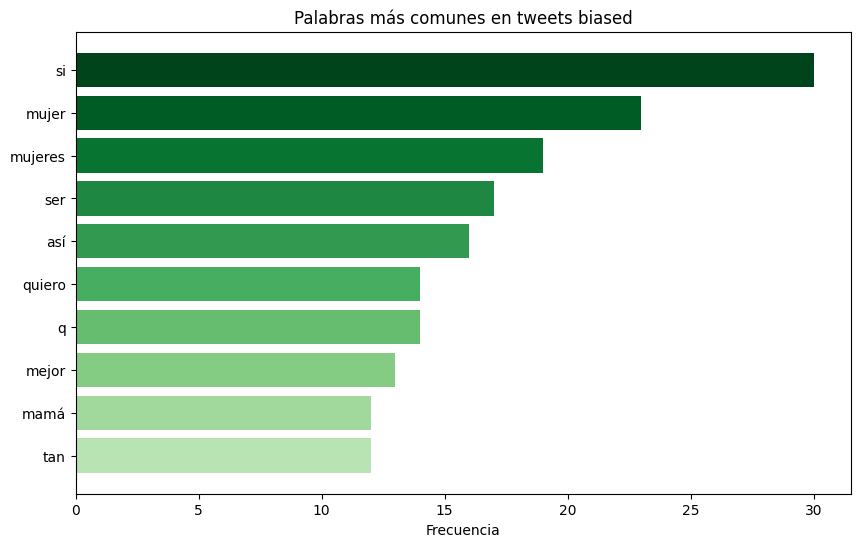

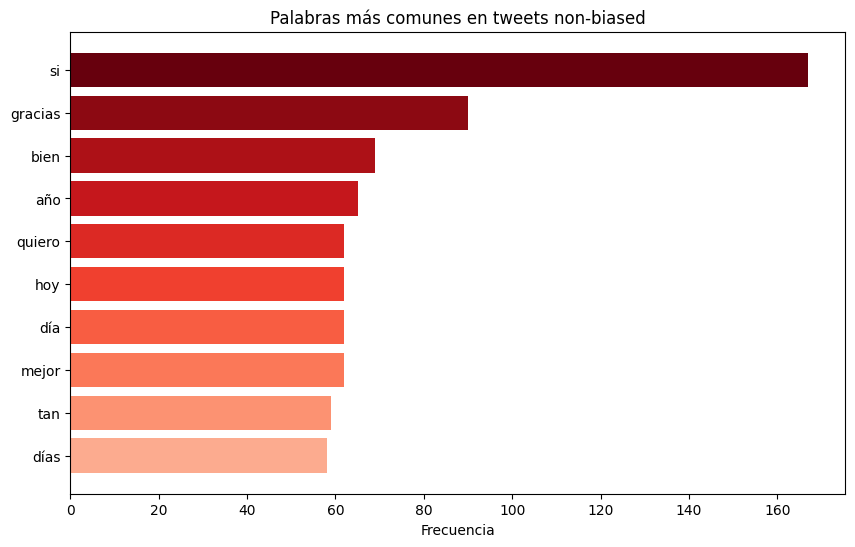

In [45]:
import numpy as np
#Visualizar las palabras más comunes en tweets biased
plt.figure(figsize=(10, 6))
colors = plt.cm.Greens(np.linspace(1, 0.3, len(biased_words_df)))
plt.barh(biased_words_df['word'], biased_words_df['count'], color=colors)
plt.xlabel('Frecuencia')
plt.title('Palabras más comunes en tweets biased')
plt.gca().invert_yaxis()
plt.show()

# Visualizar las palabras más comunes en tweets non-biased
plt.figure(figsize=(10, 6))
# Utiliza otra paleta de colores secuencial, por ejemplo 'Greens'
colors = plt.cm.Reds(np.linspace(1, 0.3, len(non_biased_words_df)))
plt.barh(non_biased_words_df['word'], non_biased_words_df['count'], color=colors)
plt.xlabel('Frecuencia')
plt.title('Palabras más comunes en tweets non-biased')
plt.gca().invert_yaxis()
plt.show()


**Preguntas de Análisis de Frecuencia:**
1.  ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
**Respuesta:** Palabras como "Palabras como "mujer" y "mujeres" aparecen entre las 10 principales en tweets biased, pero no entre las 10 principales en los non biased tweets. Esto muestra que las discusiones sobre mujeres son más frecuentes en los biased tweets de este conjunto de datos.

2. ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
**Respuesta:** La presencia de palabras como "mujer" y "mujeres" entre las principales palabras en los biased tweets podría mostrar un enfoque en temas de género dentro del contenido sesgado.

3. ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?
**Respuesta:** Esta información permite a las compañías entender la expresión de sesgos en el diálogo en línea sobre su marca o ámbito. Identificando palabras y temas ligados a tuits con sesgo, las empresas pueden afinar su comunicación para manejar sesgos particulares y evaluar la percepción de sus productos o servicios dentro del contexto de conversaciones sesgadas.

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

In [49]:
def analizar_sentimiento(text):
    return TextBlob(text).sentiment.polarity

tweets['sentiment'] = tweets['cleaned_text'].apply(analizar_sentimiento)
tweets.head()

,Contents,Label,cleaned_text,sentiment
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,cabrón tí reciben noticias colchoncito puro ch...,0.0
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable ir hacerme compra mañana ba...,0.0
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha si rico nadamas falta presentación,0.2
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,ves programa favorito sólo encuentro temporada...,0.0
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos,0.0


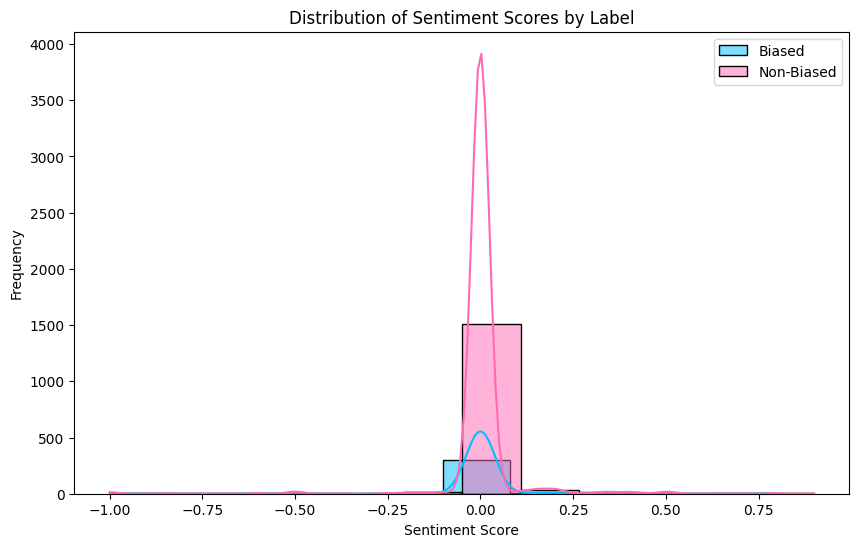

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(tweets[tweets['Label'] == 'biased']['sentiment'], color='deepskyblue', label='Biased', kde=True)
sns.histplot(tweets[tweets['Label'] == 'non-biased']['sentiment'], color='hotpink', label='Non-Biased', kde=True)
plt.title('Distribution of Sentiment Scores by Label')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Preguntas de Análisis de Sentimientos:**
1. ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
**Respuesta:** Sí, existe una diferencia notable en la distribución de los puntajes de sentimiento entre los biased y non-biased tweets. Si bien la mayoría de los tweets en ambos grupos se inclinan hacia la neutralidad (puntajes cercanos a cero), los tweets sesgados exhiben una mayor variedad de sentimientos, con puntajes que se alejan más de cero. Esto sugiere que los tweets sesgados a menudo conllevan una mayor intensidad emocional que los no sesgados, cuya distribución de sentimientos es más concentrada y cercana a la neutralidad.

2. ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
**Respuesta:** La diferencia en la distribución del sentimiento indica que los tweets con sesgo tienden a expresar puntos de vista más fuertes y cargados emocionalmente, abarcando tanto el espectro negativo como el positivo. Esta mayor carga emocional sugiere un intento de impactar o evocar una respuesta en quien lee, un rasgo típico de contenido sesgado. Por el contrario, los tweets sin sesgo suelen adoptar un tono más neutral y objetivo, priorizando la información sobre la persuasión.

3. ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?
**Respuesta:** El análisis de sentimientos permite entender cómo percibe el público un tema específico al identificar las emociones expresadas. Al examinar la distribución de sentimientos, se puede detectar tendencias generales, medir la aceptación o el rechazo de un tema y prever respuestas sociales. También facilita la segmentación de percepciones por grupos, lo que es útil para adaptar las estrategias de comunicación.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

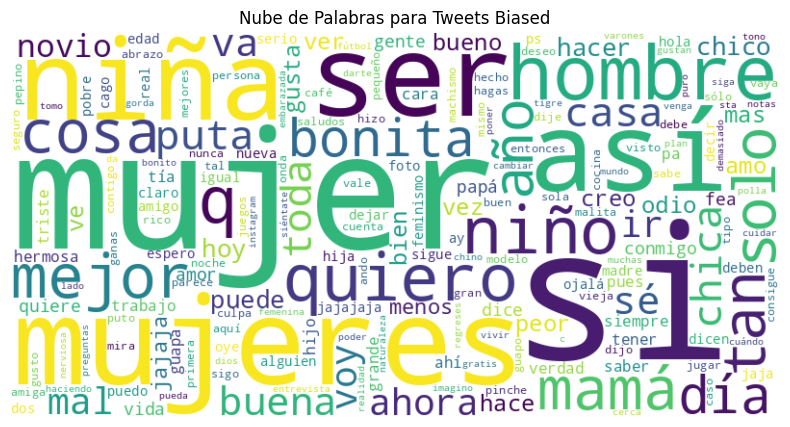

In [61]:
# Generar la nube de palabras para tweets biased
wordcloud_biased = WordCloud(width=800, height=400, background_color='white', colormap="viridis").generate(biased_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_biased, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Tweets Biased')
plt.show()

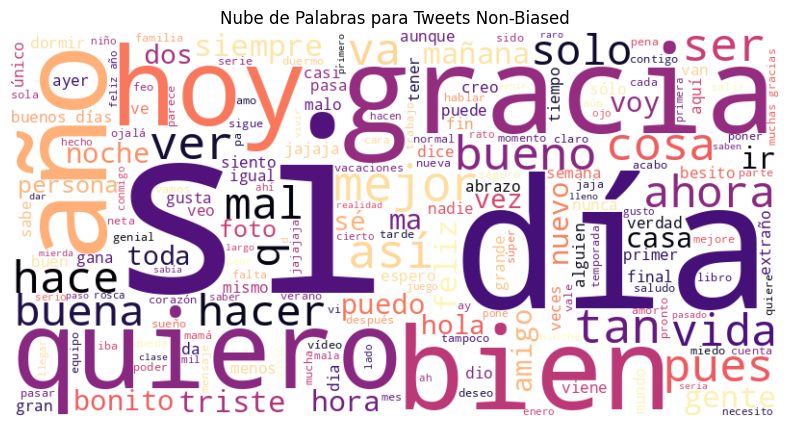

In [62]:
# Generar la nube de palabras para tweets non-biased
wordcloud_non_biased = WordCloud(width=800, height=400, background_color='white',colormap='magma').generate(non_biased_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_biased, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Tweets Non-Biased')
plt.show()

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
1. ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
**Respuesta:** Este análisis puede mejorar la comunicación de la marca al permitir la identificación proactiva de los temas y el lenguaje que son propensos a desencadenar sesgos en las conversaciones online. Al comprender las palabras clave y los sentimientos asociados a los tweets marcados como "biased", las marcas pueden refinar su comunicación para ser más conscientes e inclusivas, evitando inadvertently perpetuar estereotipos y promoviendo un discurso más equitativo en sus plataformas y campañas.

2. ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
**Respuesta:** Si los tweets son predominantemente "biased" en relación con una marca o campaña, se pueden realizar ajustes estratégicos significativos. Esto podría implicar una revisión completa del mensaje de marketing para desafiar activamente los sesgos detectados o destacar el compromiso de la marca con la diversidad y la inclusión. Se podría considerar la reorientación de la campaña hacia segmentos de audiencia menos propensos a expresar o encontrarse con sesgos, o incluso ajustar la inversión en plataformas donde el discurso sesgado es más prevalente.

3. ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?
**Respuesta:** Para un análisis futuro, sería importante explorar patrones como las tendencias a lo largo del tiempo en la aparición y naturaleza de los tweets sesgados, lo que podría revelar la efectividad de las intervenciones de marketing o los cambios en el contexto social. Investigar si existen patrones geográficos de sesgo, analizando si ciertas regiones muestran una mayor prevalencia de contenido sesgado, podría ofrecer información valiosa para campañas localizadas. Un análisis de red que examine las conexiones entre los usuarios que publican tweets sesgados podría ayudar a identificar a los principales influenciadores o nodos de difusión de sesgos.